<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cost (Loss) & Reward Functions**

In [ ]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print(tf.__version__)

2.3.0


### **Cost Functions for Regression**

##### **Introduction**

Cost, loss, risk or error function

Properties of ideal Cost functions:

* smooth, 
* continuous, 
* symmetric, 
* differentials

https://en.m.wikipedia.org/wiki/Loss_function

https://youtu.be/fr7dfyfB7mI

$\min _{W}\left\{L(W):=\frac{1}{m} \sum_{i=1}^{m} \ell\left(W ; x_{i}, y_{i}\right)+\lambda r(W)\right\}$

Complete list of [Loss / Cost Functions in TF](https://www.tensorflow.org/api_docs/python/tf/keras/losses/)

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

https://stackoverflow.com/questions/45648351/what-is-difference-between-loss-function-and-rmse-in-machine-learning

https://medium.com/@phuctrt/loss-functions-why-what-where-or-when-189815343d3f

https://towardsdatascience.com/what-is-loss-function-1e2605aeb904

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

https://towardsdatascience.com/coding-deep-learning-for-beginners-linear-regression-part-2-cost-function-49545303d29f

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#kullback-leibler

https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/regression_loss.PNG)

http://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote10.html

##### **SE, SAE & SSE**

**Sum of Errors (SE)** the difference in the predicted value and the actual value.

$\mathbf{L}=\Sigma(\hat{Y}-Y)$

Errors terms cancel each other out. 


**Sum of Absolute Errors (SAE)** takes the absolute values of the errors for all iterations.

$\mathbf{L}=\Sigma (|\hat{Y}-Y|)$

This loss function is not differentiable at 0. 

**Sum of Squared Errors (SSE)** is differentiable at all points and gives non-negative errors. But you could argue that why cannot we go for higher orders like 4th order or so. Then what if we consider to take 4th order loss function, which would look like:

$\mathbf{L}=\left[\Sigma(\hat{Y}-Y)^{2}\right]$

The gradient of the loss function will vanish at minima & maxima. And the error will grow with the sample size.

![xxx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/sumoferrors.png)

* Minimizing Sum of Squared Errors / SSE ([wiki](https://de.m.wikipedia.org/wiki/Residuenquadratsumme) and [medium](https://medium.com/@dustinstansbury/cutting-your-losses-loss-functions-the-sum-of-squared-errors-loss-4c467d52a511)).  We can think of the SSE loss as the (unscaled) variance of the model errors. 
* Therefore **minimizing the SEE loss is equivalent to minimizing the variance of the model residuals**. For this reason, the sum of squares loss is often referred to as the Residual Sum of Squares error (RSS) for linear models. We can think of minimizing the SSE loss as maximizing the covariance between the real outputs and those predicted by the model.
* Ideal when distribution of residuals in normal: the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss–Markov_theorem) states that if errors of a linear function are distributed Normally about the mean of the line, then the LSS solution gives the [best unbiased estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator) for the parameters .
* Problem: Because each error is squared, any outliers in the dataset can dominate the parameter estimation process. For this reason, the LSS loss is said to lack robustness. Therefore preprocessing of the the dataset (i.e. removing or thresholding outlier values) may be necessary when using the LSS loss

##### **MSE (L2 Loss)**

In [ ]:
loss = 'mse'

$\mathrm{MSE}={\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Mean Squared Error (L2 or Quadratic Loss). Error decreases as we increase our sample data as the distribution of our data becomes more and more narrower (referring to normal distribution). The more data we have, the less is the error.
* Can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better. It is always non – negative and values close to zero are better. The MSE is the second moment of the error (about the origin) and thus incorporates both the variance of the estimator and its bias.
* Problem: Sensitive to outliers and the order of loss is more than that of the data. As my data is of order 1 and the loss function, MSE has an order of 2 (squared). So we cannot directly correlate data with the error. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate)

In [ ]:
def mse(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing square differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += (prediction - target)**2
        
    # Calculating mean and dividing by 2
    mae_error = (1.0 / (2*samples_num)) * accumulated_error
    
    return mae_error

**Mean Squared Logarithmic Error (MSLR)**

* Mean Squared Logarithmic Error
* https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredLogarithmicError

##### **RMSE**

$\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{j=1}^{n}\left(y_{j}-\hat{y}_{j}\right)^{2}}$

* Root-Mean-Square Error is the distance, on average, of a data point from the fitted line, measured along a vertical line.
* The **RMSE is directly interpretable in terms of measurement units**, and so is a better measure of goodness of fit than a correlation coefficient. One can compare the RMSE to observed variation in measurements of a typical point. The two should be similar for a reasonable fit. Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable
* https://en.m.wikipedia.org/wiki/Root-mean-square_deviation

**RMSLE**

* Abzüge für Fehler nach der relativen Größe statt des absoluten Werts vornehmen. Das ist besonders hilfreich, wenn sowohl die vorhergesagten als auch die tatsächlichen Werte sehr groß werden können. Nicht gültig für eine Zielspalte mit negativen Werten

**RMSPE**

##### **MAE (L1 Loss)**

In [ ]:
loss = 'mae'

$\mathrm{MAE}=\frac{1}{n} \sum_{j=1}^{n}\left|y_{j}-\hat{y}_{j}\right|$

*If the absolute value is not taken (the signs of the errors are not removed), the average error becomes the Mean Bias Error (MBE) and is usually intended to measure average model bias. MBE can convey useful information, but should be interpreted cautiously because positive and negative errors will cancel out.*

* Mean Absolute Error (L1 Loss)
* Computes the mean of absolute difference between labels and predictions
* measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
* Metric can range from 0 to ∞ and are indifferent to the direction of errors. It is  negatively-oriented scores, which means lower values are better.
* Extremwerte als Ausreißer mit geringerem Einfluss auf das Modell ansehen: MAE loss is useful if the training data is corrupted with outliers (i.e. we erroneously receive unrealistically huge negative/positive values in our training environment, but not our testing environment).


In [ ]:
def mae(predictions, targets):
    # Retrieving number of samples in dataset
    samples_num = len(predictions)
    
    # Summing absolute differences between predicted and expected values
    accumulated_error = 0.0
    for prediction, target in zip(predictions, targets):
        accumulated_error += np.abs(prediction - target)
        
    # Calculating mean
    mae_error = (1.0 / samples_num) * accumulated_error
    
    return mae_error

**MSE vs MSE**

One big problem in using MAE loss (for neural nets especially) is that its gradient is the same throughout, which means the gradient will be large even for small loss values. This isn’t good for learning. To fix this, we can use dynamic learning rate which decreases as we move closer to the minima. MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training (see figure below.)

![xx](https://raw.githubusercontent.com/deltorobarba/machinelearning/master/mae_vs_mse.PNG)

**Mean Absolute Percentage Error (MAPE)**

* https://en.m.wikipedia.org/wiki/Mean_absolute_percentage_error

**Symmetric Mean Absolute Percentage Error (sMAPE)**

* https://en.m.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

##### **Huber**

In [ ]:
loss = tf.keras.losses.Huber(delta=100.0, name='huber_loss')

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Huber_loss.svg/320px-Huber_loss.svg.png)

*Huber loss (green, 
δ
=
1) and squared error loss (blue) as a function of 
y
−
f
(
x
)*

$L_{\delta}(y, f(x))=\left\{\begin{array}{ll}
\frac{1}{2}(y-f(x))^{2} & \text { for }|y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.$

* Huber Loss (Smooth Mean Absolute Error)

* The Huber loss **combines the best properties of MSE and MAE** (Mean Absolute Error). It is quadratic for smaller errors and is linear otherwise (and similarly for its gradient). It is identified by its delta parameter.

* It's **less sensitive to outliers** in data than the squared error loss. It’s **also differentiable at 0**. It’s basically absolute error, which becomes quadratic when error is small.  How small that error has to be to make it quadratic depends on a hyperparameter 𝛿. 

* Once differentiable.

* **Huber loss approaches MSE when 𝛿 ~ 0 and MAE when 𝛿 ~ ∞**

* The choice of delta is critical because it determines what you’re willing to consider as an outlier. Residuals larger than delta are minimized with L1 (which is less sensitive to large outliers), while residuals smaller than delta are minimized “appropriately” with L2.

* One big problem with using MAE for training of neural nets is its constantly large gradient, which can lead to missing minima at the end of training using gradient descent. For MSE, gradient decreases as the loss gets close to its minima, making it more precise.
Huber loss can be really helpful in such cases, as it curves around the minima which decreases the gradient. And it’s more robust to outliers than MSE. Therefore, **it combines good properties from both MSE and MAE**. 

* However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process.

* [Wiki](https://en.m.wikipedia.org/wiki/Huber_loss) * [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber)

##### **Log-Cosh**

In [ ]:
loss = tf.keras.losses.LogCosh()

* Log-cosh is another function used in regression tasks that’s smoother than L2
* Log-cosh is the logarithm of the hyperbolic cosine of the prediction error.
* Similar to Huber Loss, but twice differentiable everywhere
* [Wiki Hyperbolic Functions](https://en.m.wikipedia.org/wiki/Hyperbolic_functions), [TF Class](https://www.tensorflow.org/api_docs/python/tf/keras/losses/LogCosh)

##### **Quantile**

In [ ]:
loss = tfa.losses.PinballLoss(tau=.1)

![xx](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Pinball_Loss_Function.svg/320px-Pinball_Loss_Function.svg.png)

*Pinball-Verlustfunktion mit 
τ
=0,9. Für 
ε
<
0 beträgt der Fehler 
−
0
,
1
ε, für 
ε
≥
0 beträgt er 
0
,
9
ε.*

* Quantile Loss (Pinball Loss)
* estimates conditional “quantile” of a response variable given certain values of predictor variables
* is an extension of MAE (**when quantile is 50th percentile, it’s MAE**)
* Im Gegensatz zur Kleinste-Quadrate-Schätzung, die den Erwartungswert der Zielgröße schätzt, ist die Quantilsregression dazu geeignet, ihre Quantile zu schätzen.
* Fitting models for many percentiles, you can estimate the entire conditional distribution. Often, the answers to important questions are found by modeling percentiles in the tails of the distribution. For that reason **quantile regression provides critical insights in financial risk management & fraud detection**. 
* [Wikipedia](https://de.m.wikipedia.org/wiki/Quantilsregression), [TF Class](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/PinballLoss) & [TF Function](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss)

https://www.evergreeninnovations.co/blog-quantile-loss-function-for-machine-learning/

* project where predictions were subject to high uncertainty. The client required for their decision to be driven by both the predicted machine learning output and a measure of the potential prediction error. The quantile regression loss function solves this and similar problems by replacing a single value prediction by prediction intervals.

* The quantile regression loss function is applied to predict quantiles. A quantile is the value below which a fraction of observations in a group falls. For example, a prediction for quantile 0.9 should over-predict 90% of the times.

* For q equal to 0.5, under-prediction and over-prediction will be penalized by the same factor, and the median is obtained. The larger the value of q, the more over-predictions are penalized compared to under-predictions. For q equal to 0.75, over-predictions will be penalized by a factor of 0.75, and under-predictions by a factor of 0.25. The model will then try to avoid over-predictions approximately three times as hard as under-predictions, and the 0.75 quantile will be obtained.

### **Cost Functions for Binary Classification**

##### **Binary Cross-Entropy**

* Cross-entropy is the default loss function to use for binary classification problems.

* It is intended for use with binary classification where the target values are in the set {0, 1}.

* Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.

* Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.

* The function requires that the output layer is configured with a single node and a ‘sigmoid‘ activation in order to predict the probability for class 1.

##### **Hinge Loss**

* An alternative to cross-entropy for binary classification problems is the hinge loss function, primarily developed for use with Support Vector Machine (SVM) models.
* It is intended for use with binary classification where the target values are in the set {-1, 1}.
* The hinge loss function encourages examples to have the correct sign, assigning more error when there is a difference in the sign between the actual and predicted class values.

##### **Squared Hinge Loss**

* The hinge loss function has many extensions, often the subject of investigation with SVM models.

* A popular extension is called the squared hinge loss that simply calculates the square of the score hinge loss. It has the effect of smoothing the surface of the error function and making it numerically easier to work with.

* If using a hinge loss does result in better performance on a given binary classification problem, is likely that a squared hinge loss may be appropriate.

* As with using the hinge loss function, the target variable must be modified to have values in the set {-1, 1}.

https://en.m.wikipedia.org/wiki/Loss_functions_for_classification

### **Cost Functions for Multiclass Classification**

##### **Contrastive Loss**

https://gombru.github.io/2019/04/03/ranking_loss/

##### **Categorical Cross Entropy**

##### **Sparse Cross-Entropy**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss = 'sparse_categorical_crossentropy'

##### **Log-Loss (Cross-Entropy Loss / negative log-likelihood)**

$-(y \log (p)+(1-y) \log (1-p))$

* It measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

* So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value.  A perfect model would have a log loss of 0.

* Cross-entropy and log loss are slightly different depending on context, but in machine learning when calculating error rates between 0 and 1 they resolve to the same thing. 

##### **Poison Loss**

##### **Focal Loss**

##### **Logistic Loss**

##### **Tangent Loss**

##### **Exponential Loss**

##### **Kullback-Leibler Divergence**

In [ ]:
loss = kullback leibler

### **Define Model & Run**

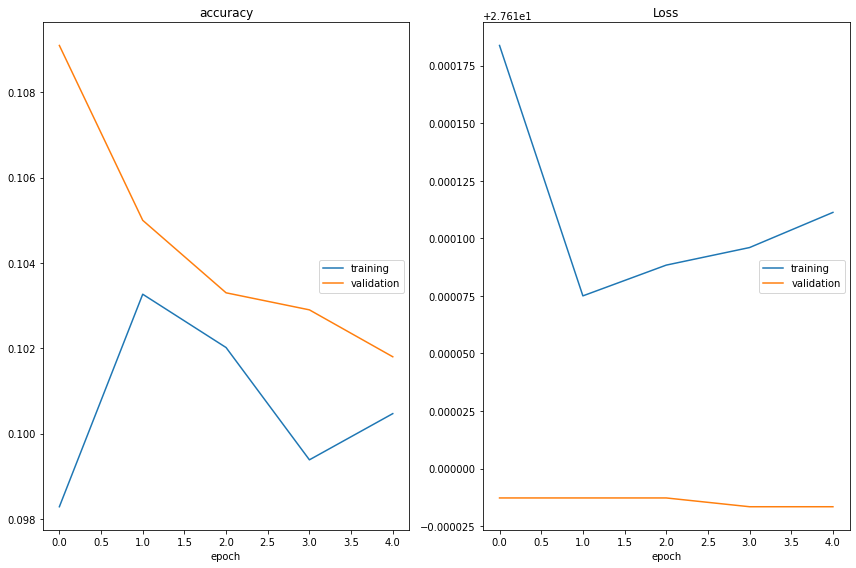

accuracy
	training         	 (min:    0.098, max:    0.103, cur:    0.100)
	validation       	 (min:    0.102, max:    0.109, cur:    0.102)
Loss
	training         	 (min:   27.610, max:   27.610, cur:   27.610)
	validation       	 (min:   27.610, max:   27.610, cur:   27.610)
1875/1875 [==============================] - 8s 4ms/step - loss: 27.6101 - accuracy: 0.1005 - val_loss: 27.6100 - val_accuracy: 0.1018


In [ ]:
# Load & Prepare Data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile Model
model.compile(optimizer='adam', 
              loss=loss, 
              metrics=['accuracy'])

# Train Model
model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKerasTF()],
          verbose=1)